In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
from statsmodels.graphics.regressionplots import influence_plot, plot_regress_exog
%matplotlib inline
%precision 3

df = pd.read_csv('D:/ExcelR/Data Science/Assignments/Multiple Linear Regression/50_startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## EDA

In [286]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [287]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [288]:
# df.replace(0, np.nan, inplace=True)
# df

In [289]:
df.rename(columns={'R&D Spend': 'RnD', 'Marketing Spend': 'Marketing'}, inplace=True)
df.columns

Index(['RnD', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

In [290]:
# from sklearn.impute import SimpleImputer
# si = SimpleImputer(strategy='median')
# df[['RnD', 'Marketing']] = si.fit_transform(df[['RnD', 'Marketing']])

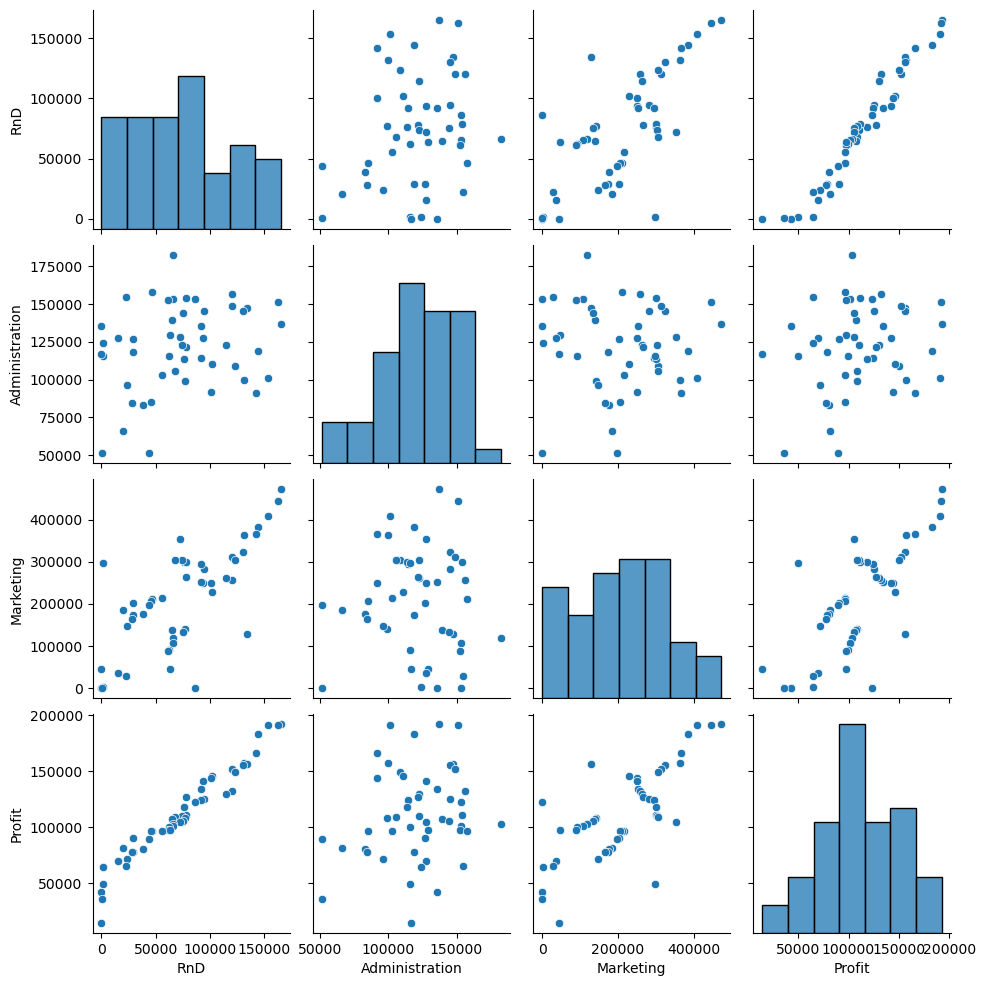

In [291]:
sns.pairplot(df)

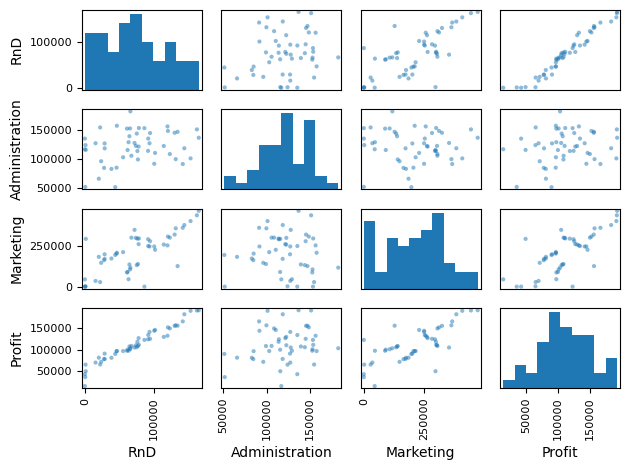

In [292]:
pd.plotting.scatter_matrix(df)
plt.tight_layout()

<AxesSubplot:>

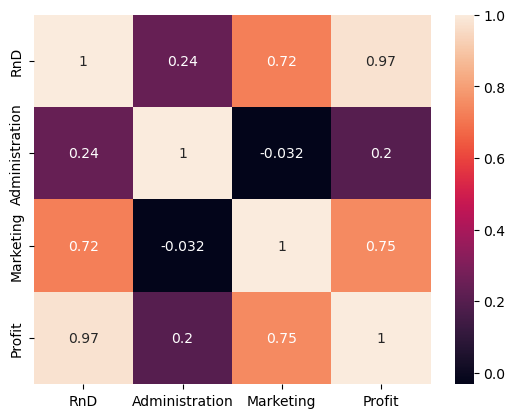

In [293]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

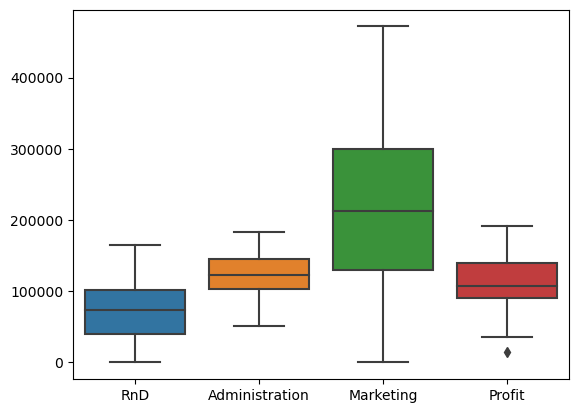

In [294]:
sns.boxplot(df)

### Model Building and Testing

In [295]:
model = smf.ols('Profit~Marketing+RnD+Administration', data=df).fit()
print(f'R2 value = {model.rsquared}') 
print(f'Adj R2 value = {model.rsquared_adj}\n') 
print(f'p-values:\n{model.pvalues}\n')
print(f't-values:\n{model.tvalues}')

R2 value = 0.9507459940683246
Adj R2 value = 0.9475337762901719

p-values:
Intercept         1.057379e-09
Marketing         1.047168e-01
RnD               2.634968e-22
Administration    6.017551e-01
dtype: float64

t-values:
Intercept          7.626218
Marketing          1.655077
RnD               17.846374
Administration    -0.525507
dtype: float64


#### From the p-values above we can see that Marketing and Administration features are not contributing to the model i.e. 
##### Null hypothesis(H0): B1 = 0
##### Alternate Hypothesis(H1): B1 != 0
##### Since p-values for Marketing and Administration are greater 0.05  we fail to reject H0, implying that the slope = 0

In [296]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        19:58:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
RnD                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Building SLR to check insignificant values and check their tvalues and pvalues

### Administration model

In [297]:
admin = smf.ols('Profit~Administration', data=df).fit()
admin.pvalues, admin.tvalues

(Intercept         0.003824
 Administration    0.162217
 dtype: float64,
 Intercept         3.040044
 Administration    1.419493
 dtype: float64)

### Since pvalue > 0.05 we fail to reject H0,  slope for Administration is 0 and is insignificant

### Marketing model

In [298]:
market = smf.ols('Profit~Marketing', data=df).fit()
market.pvalues, market.tvalues

(Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64,
 Intercept    7.808356
 Marketing    7.802657
 dtype: float64)

### Since pvalue < 0.05 so we ca reject H0, slope for Marketing is not 0 and has some significance

### Marketing and Administration model

In [299]:
mark_admin = smf.ols('Profit~Administration+Marketing', data=df).fit()
mark_admin.pvalues, mark_admin.tvalues

(Intercept         2.589341e-01
 Administration    1.729198e-02
 Marketing         9.727245e-11
 dtype: float64,
 Intercept         1.142741
 Administration    2.467779
 Marketing         8.281039
 dtype: float64)

### Since pvalues < 0.05 we can reject H0, slope for Marketing and Administration is not 0 and thus have some significance

## Model validation

### Two Techniques 
#### 1. Collinearity Check

In [300]:
r_rnd = smf.ols('RnD~Administration+Marketing', data=df).fit().rsquared
rnd_vif = 1 / (1-r_rnd)

r_admin = smf.ols('Administration~RnD+Marketing', data=df).fit().rsquared
admin_vif = 1 / (1-r_admin)

r_mark = smf.ols('Marketing~Administration+RnD', data=df).fit().rsquared
mark_vif = 1 / (1-r_mark)

v_df = pd.DataFrame({'Variables':['RnD', 'Marketing', 'Administration'], 'VIF': [rnd_vif, mark_vif, admin_vif]})
v_df

,Variables,VIF
0,RnD,2.468903
1,Marketing,2.326773
2,Administration,1.175091


#### Since no VIF > 20, no multicollinearity exists so we can consider all the features

#### 2. Residual Analysis

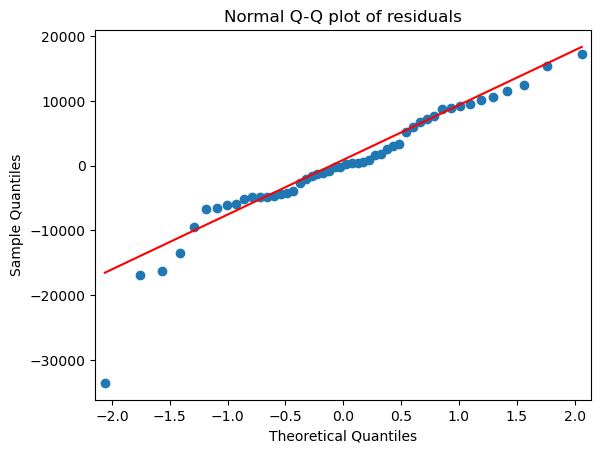

In [301]:
qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [302]:
np.where(model.resid < -30000)

(array([49], dtype=int64),)

### Test for homoscedasticity

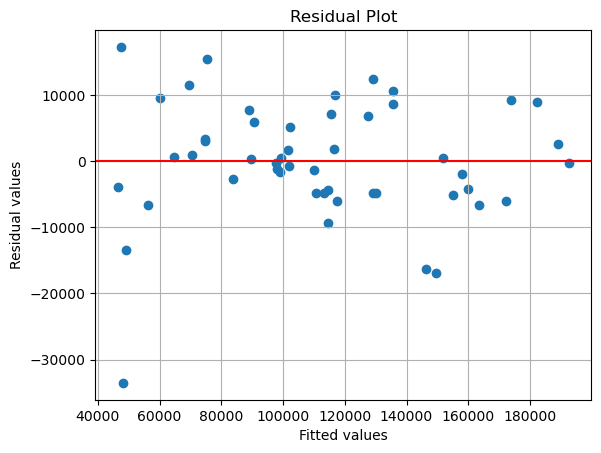

In [303]:
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residual values')
plt.axhline(y=0, color='red')
plt.grid()

In [304]:
# Test for errors or Residuals vs Regressor or independent 'x' variables or predictors
# using Residual Regrssion plots code plot_regress_exog(model, 'x', fig)   exog = 'x' variable' endog = 'y' variable

eval_env: 1


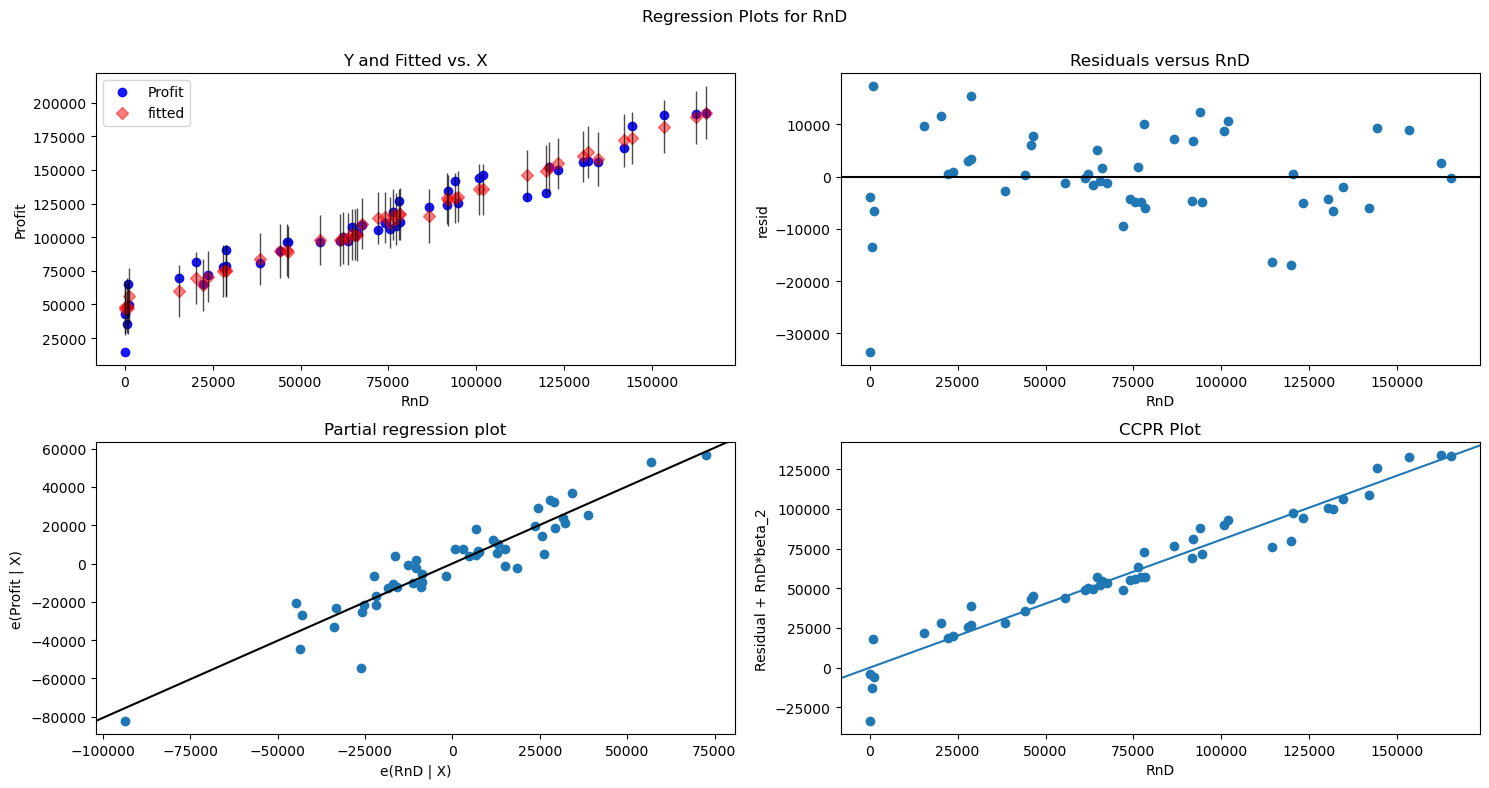

In [305]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'RnD', fig=fig)
plt.show()

eval_env: 1


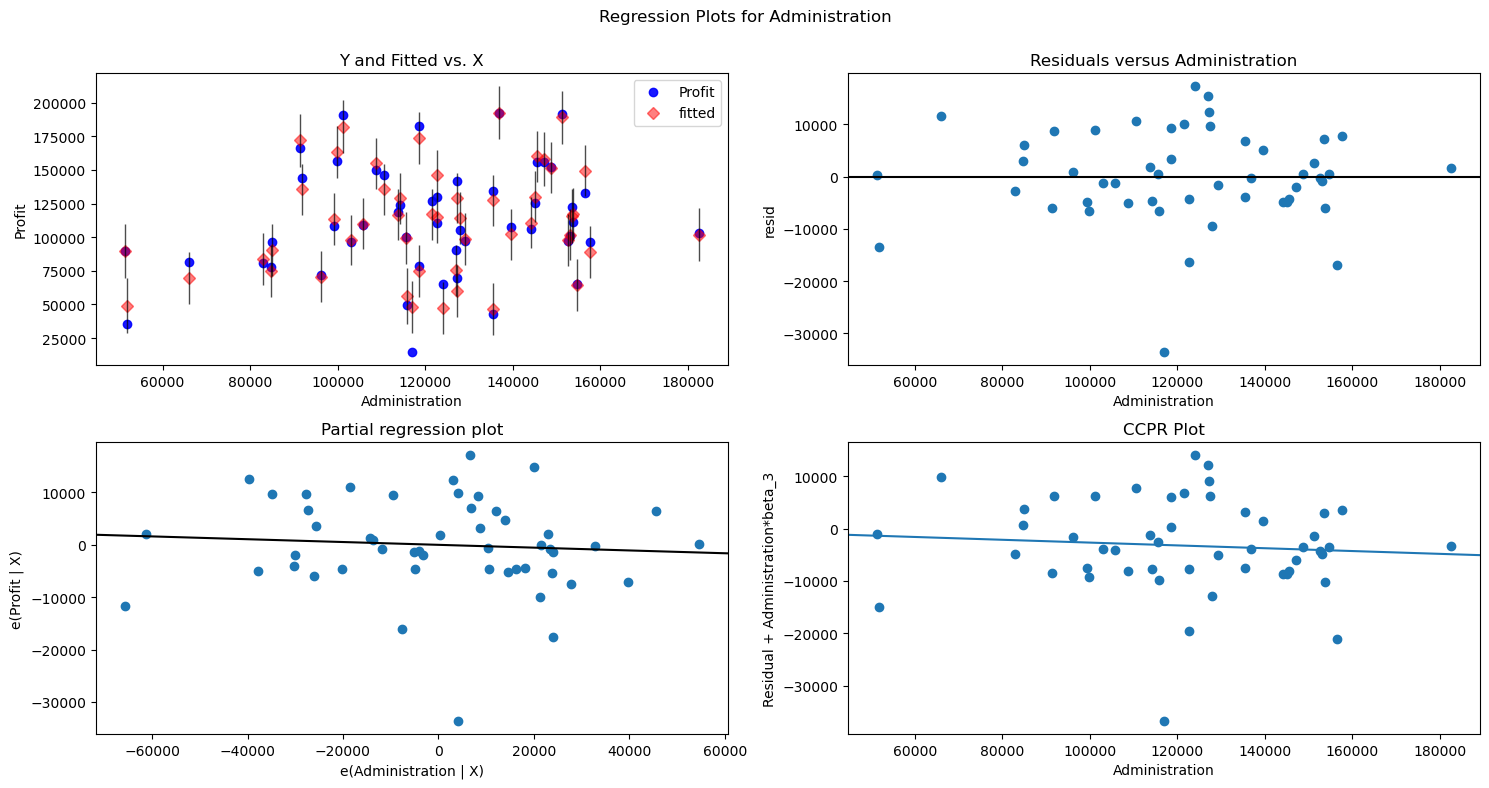

In [306]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'Administration', fig=fig)
plt.show()

eval_env: 1


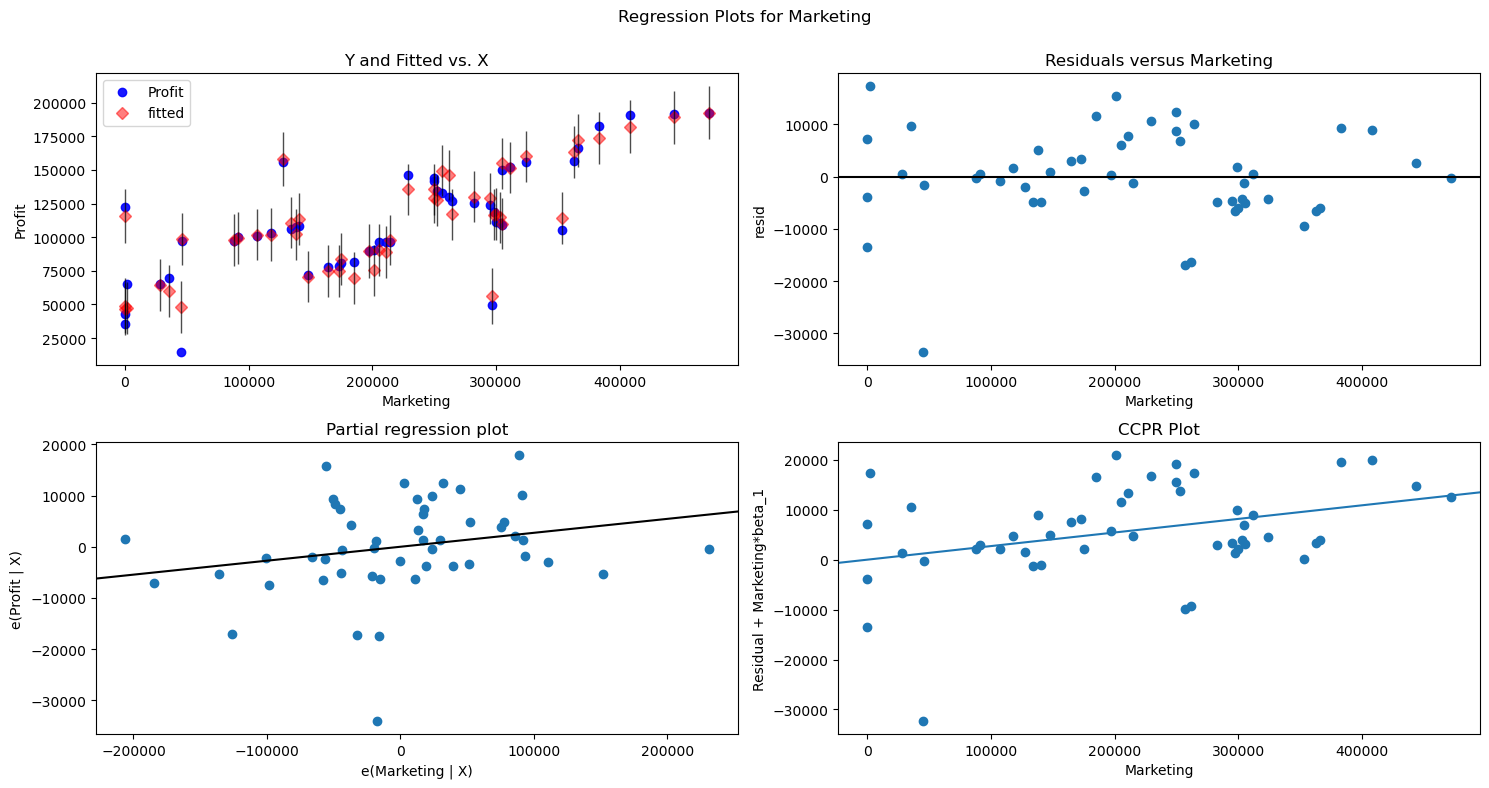

In [307]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'Marketing', fig=fig)
plt.show()

## Model Deletion Diagnostics (Checking outliers and Influences)

### Two Techniques: 1. Cook's Distance, 2. Leverage value

In [308]:
# 1. If Cook's distance > 1 it is an outlier
c, _ = model.get_influence().cooks_distance
c

array([3.218e-05, 3.276e-03, 3.238e-02, 2.172e-02, 1.448e-02, 1.172e-02,
       2.918e-03, 3.565e-03, 4.043e-05, 4.868e-03, 1.511e-02, 1.636e-02,
       1.155e-02, 4.014e-03, 6.129e-02, 3.400e-02, 8.336e-03, 3.305e-03,
       2.168e-03, 4.074e-02, 4.251e-04, 1.098e-02, 2.918e-03, 2.760e-04,
       5.046e-03, 3.001e-03, 3.420e-03, 2.984e-02, 1.316e-03, 1.260e-04,
       4.185e-05, 9.274e-06, 7.087e-04, 1.281e-04, 2.098e-02, 6.695e-03,
       5.553e-02, 6.551e-05, 5.615e-02, 1.543e-03, 1.849e-03, 1.976e-03,
       1.361e-04, 2.056e-02, 1.232e-04, 9.032e-02, 5.453e-02, 5.339e-03,
       1.905e-01, 2.881e-01])

Text(0, 0.5, "Cook's Distance")

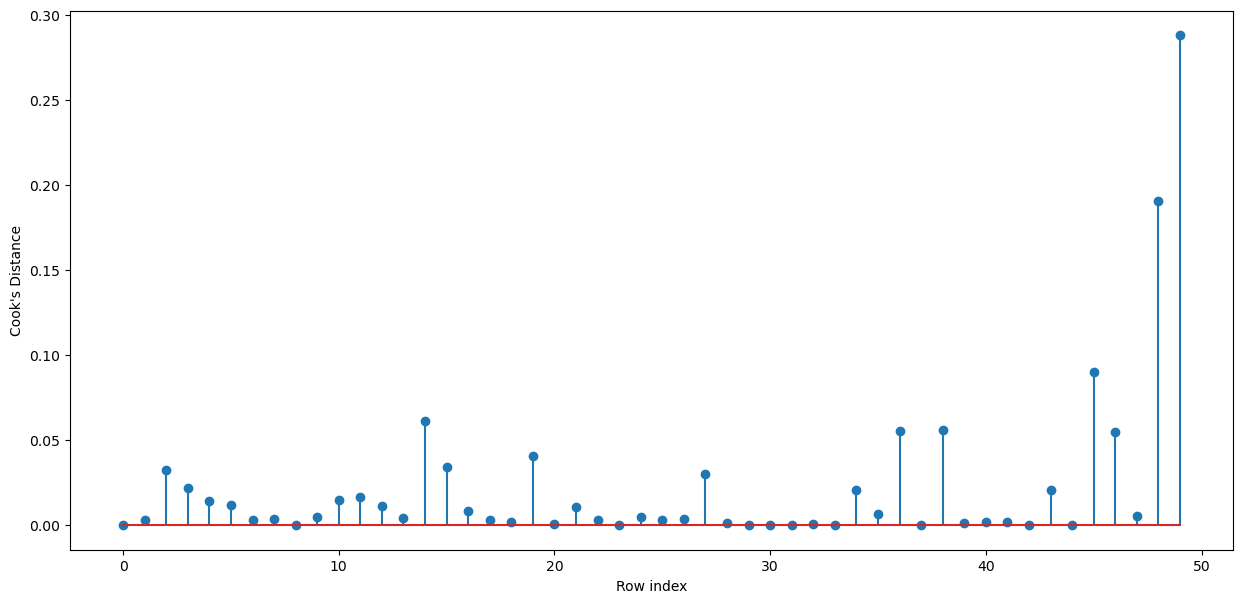

In [309]:
# plotting influencers using stem plt
fig = plt.figure(figsize=(15, 7))
plt.stem(np.arange(len(df)), c)
plt.xlabel('Row index')
plt.ylabel('Cook\'s Distance')

In [310]:
# Index and maximum value of cook's distance 
f"Maximum value of cook's distance is {round(c.max(), 5)} and is located at index {c.argmax()}"

"Maximum value of cook's distance is 0.28808 and is located at index 49"

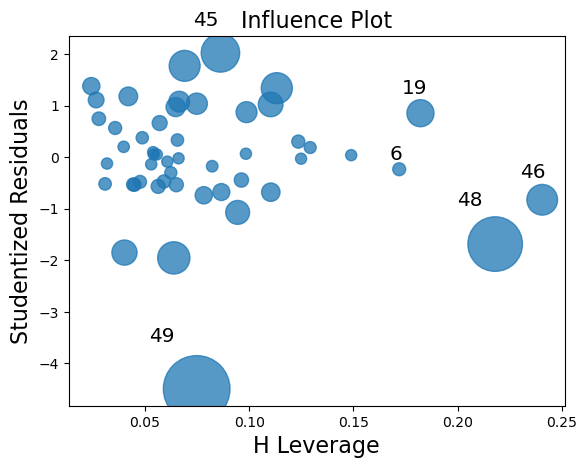

In [311]:
# 2. Leverage value using High Influence points: Points that are above the leverage value are influencers
influence_plot(model)
plt.show()

In [312]:
k = df.shape[1]
n = df.shape[0]
cutoff = 3 * (k+1)/n
cutoff

0.360

### We can see that index number 49 is highly influential and an outlier so we can remove that data point

In [313]:
df.iloc[[49], :] # == df[df.index.isin([49])]

,RnD,Administration,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [314]:
df = df.drop(49)
df

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Model deletion and final model

In [315]:
# while c.max() > 0.5:
#     model = smf.ols('Profit~Administration+Marketing+RnD', data=df).fit()
#     c = model.get_influence().cooks_distance[0]
#     df = df.drop(c.argmax())

final_model = smf.ols('Profit~Administration+Marketing+RnD', data=df).fit()
print(f'Final model accuracy = {final_model.rsquared}')    

Final model accuracy = 0.9613162435129847


In [318]:
# Predicting profit
predicted_df = pd.DataFrame({'Actual value': df['Profit'], 'Predicted value': final_model.predict(df)})
predicted_df

,Actual value,Predicted value
0,192261.83,190716.676999
1,191792.06,187537.122227
2,191050.39,180575.526396
3,182901.99,172461.144642
4,166187.94,170863.486721
5,156991.12,162582.583177
6,156122.51,157741.338633
7,155752.60,159347.735318
8,152211.77,151328.826941
9,149759.96,154236.846778


In [320]:
metrics_df = pd.DataFrame({'R_squared': [model.rsquared, final_model.rsquared]}, index=['Original model', 'Final model'])
metrics_df

,R_squared
Original model,0.950746
Final model,0.961316
